In [1]:
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = 'Alien_data'

In [3]:
# create a feature table from the filtered table
! qiime feature-table summarize \
  --i-table $data_dir/table-filtered.qza \
  --m-sample-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/feature_table_filtered.qzv

Saved Visualization to: Alien_data/feature_table_filtered.qzv


In [4]:
Visualization.load(f'{data_dir}/feature_table_filtered.qzv')

<visualization: Visualization uuid: 2487b6e7-8ae4-4576-ab49-dad0e63f1d21>

Alpha rarefaction using the fragment insert tree:

In [5]:
# show rarefaction plot (we can also try to increase the depth) 
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table-filtered.qza \
    --i-phylogeny $data_dir/sepp-tree.qza \
    --p-max-depth 10000 \
    --m-metadata-file $data_dir/sample_metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction.qzv

Saved Visualization to: Alien_data/alpha-rarefaction.qzv


In [6]:
Visualization.load(f'{data_dir}/alpha-rarefaction.qzv')

<visualization: Visualization uuid: b4647282-6c0f-4622-aca0-929ebcfe30b8>

Alpha rarefaction using the de novo tree:

In [7]:
# A slightly different plot by using the bootstraped tree, but the trends are similar:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table-filtered.qza \
    --i-phylogeny $data_dir/raxml-cat-bootstrap-rooted.qza \
    --p-max-depth 10000 \
    --m-metadata-file $data_dir/sample_metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction-denovo.qzv

Saved Visualization to: Alien_data/alpha-rarefaction-denovo.qzv


In [8]:
Visualization.load(f'{data_dir}/alpha-rarefaction-denovo.qzv')

<visualization: Visualization uuid: 600cb091-9e24-4edb-87a2-50d9db9f1b99>

In [9]:
# sampling depth of 3000 is chosen (we can also discuss which is the best depth to chose)
# 4000?
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/table-filtered.qza \
  --i-phylogeny $data_dir/sepp-tree.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --p-sampling-depth 3000 \
  --output-dir $data_dir/core-metrics-results

Saved FeatureTable[Frequency] to: Alien_data/core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: Alien_data/core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: Alien_data/core-metrics-results/weighted_unifrac_pcoa_results.qza
Saved PCo

In [10]:
Visualization.load(f'{data_dir}/alpha-rarefaction-rooted.qzv')

<visualization: Visualization uuid: c956a1ca-1a63-4313-bf56-3505278833ba>

Test the associations between categorical metadata columns with the corresponding Diversity metrics: 

In [11]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/faith-pd-group-significance.qzv


In [12]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance.qzv')

<visualization: Visualization uuid: 9fd0cc30-aafd-4598-9174-7b976e83a121>

In [13]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/observed_features_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/observed-features-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/observed-features-group-significance.qzv


In [14]:
Visualization.load(f'{data_dir}/core-metrics-results/observed-features-group-significance.qzv')

<visualization: Visualization uuid: 3b86625f-20aa-4faa-83b8-b8ef3e265e6a>

In [15]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/shannon_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/shannon-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/shannon-group-significance.qzv


In [16]:
Visualization.load(f'{data_dir}/core-metrics-results/shannon-group-significance.qzv')

<visualization: Visualization uuid: 05ed7a34-e96b-4608-9b8c-b9076de9d80f>

In [17]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/evenness-vector-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/evenness-vector-group-significance.qzv


In [18]:
Visualization.load(f'{data_dir}/core-metrics-results/evenness-vector-group-significance.qzv')

<visualization: Visualization uuid: 497a1b39-0d45-4e4a-888e-46de8c4fd117>

Test whether numeric sample metadata columns are correlated with microbial community:
(here I think we should change abduntion to categorical variable instead of using numeric of 0 and 1)

In [19]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/faith-pd-group-significance-numeric.qzv


In [20]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: 53674385-9eb2-4a93-8d32-78613498041a>

In [21]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/observed_features_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/observed-features-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/observed-features-group-significance-numeric.qzv


In [22]:
Visualization.load(f'{data_dir}/core-metrics-results/observed-features-group-significance-numeric.qzv')

<visualization: Visualization uuid: 8d242089-6586-452d-95b3-92cb6c984298>

In [23]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/shannon_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/shannon-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/shannon-group-significance-numeric.qzv


In [24]:
Visualization.load(f'{data_dir}/core-metrics-results/shannon-group-significance-numeric.qzv')

<visualization: Visualization uuid: 5da890a1-e515-4709-bedd-851b606272dd>

In [25]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/evenness-vector-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/evenness-vector-group-significance-numeric.qzv


In [26]:
Visualization.load(f'{data_dir}/core-metrics-results/evenness-vector-group-significance-numeric.qzv')

<visualization: Visualization uuid: b986a738-dee0-459f-9f98-5026e18800f3>

In [27]:
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'sample_metadata.tsv'), sep='\t', index_col=0)['categorical_time_relative_to_engraftment']
# we can use different columns for md, here I just made an example of 'categorical_time_relative_to_engraftment'

In [28]:
md

sampleid
N4VICF     pre
8A0F9A     pre
5Y49IM    peri
ZKJI45    post
2I7SIQ    peri
          ... 
HCMB0Y     pre
P0A2X1     pre
F89RLS     pre
ZQT8ZN     pre
62ARKK     pre
Name: categorical_time_relative_to_engraftment, Length: 161, dtype: object

In [29]:
md1=md.dropna()
div1=div.dropna()
concat=pd.concat([md1,div1], axis=1, join='inner')
concat

,categorical_time_relative_to_engraftment,faith_pd
N4VICF,pre,9.204279
8A0F9A,pre,8.891297
2I7SIQ,peri,6.830881
PCUMU7,post,6.263762
XO59R8,pre,10.169812
...,...,...
U5Y4NC,pre,7.159809
HCMB0Y,pre,7.729454
P0A2X1,pre,5.662648
F89RLS,pre,5.138471


Text(0, 0.5, 'faith_pd')

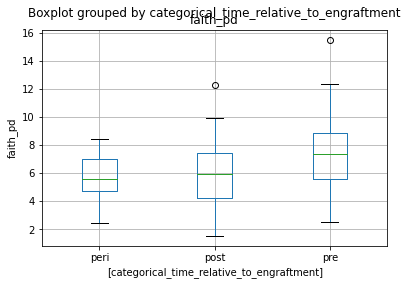

In [30]:
concat.boxplot(by='categorical_time_relative_to_engraftment')
plt.ylabel('faith_pd')